In [1]:
import sys
sys.path.append('../')
from xd import *
from utils import *
import esutil
import healpy as hp
from systematics import *
from systematics_module import *
import os
from numpy.lib.recfunctions import append_fields
import scipy.stats

import matplotlib.pyplot as plt
import numpy as np

In /users/PCON0003/warner785/.conda/envs/DES_env/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In /users/PCON0003/warner785/.conda/envs/DES_env/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The verbose.level rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In /users/PCON0003/warner785/.conda/envs/DES_env/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The verbose.fileo rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.


In [2]:
# calling initial map 

path = '/fs/scratch/PCON0008/warner785/bwarner/'
LSSGoldmask = fitsio.read(path+'MASK_Y3LSSBAOSOF_22_3_v2p2.fits') #BAO is different measurement, may be different from this analysis
# 'Y1LSSmask_v2_redlimcut_il22_seeil4.0_4096ring.fits'
#GoldMask = callingEliGoldMask()
LSSMask = LSSGoldmask
GoldMask = LSSGoldmask

pixra, pixdec = hp.pix2ang(nside=4096,ipix=GoldMask['PIXEL'],nest=True,lonlat=True)
GoldMask = append_fields(GoldMask, 'RA', pixra, usemask=False)
GoldMask = append_fields(GoldMask, 'DEC', pixdec, usemask=False)

#create spt region cut:
mask_spt = (GoldMask['RA']>295)&(GoldMask['RA']<360)|(GoldMask['RA']<105)
mask_spt = mask_spt & (GoldMask['DEC']>-68) & (GoldMask['DEC']<-10)
GoldMask_spt = GoldMask[mask_spt]

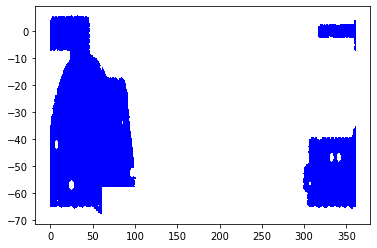

In [3]:
fig, ax = plt.subplots()
ax.plot( GoldMask['RA'], GoldMask['DEC'], "b,")

In [4]:
GoldMask_spt['PIXEL'] = hp.nest2ring(4096, GoldMask_spt['PIXEL'])
pixel = GoldMask_spt['PIXEL']
GoldMask_spt = appendColumn(GoldMask_spt, name='HPIX', value= pixel )

In [5]:
pixarea = hp.nside2pixarea( 4096, degrees = True)
sptnpix = GoldMask_spt['HPIX'].size #hp.get_map_size( GoldMask_spt['PIXEL'] )
SPTMaparea = pixarea * sptnpix
print(SPTMaparea)

3524.632514386404


In [6]:
print(GoldMask_spt.dtype.names)

('PIXEL', 'SIGNAL', 'RA', 'DEC', 'HPIX')


In [7]:
##path = '/fs/scratch/PCON0008/warner785/bwarner/'

##fracDet = fitsio.read(path+'y3a2_griz_o.4096_t.32768_coverfoot_EQU.fits.gz')
##fracDet['PIXEL'] = hp.nest2ring(4096, fracDet['PIXEL'])

##frac_sig = np.zeros(hp.nside2npix(4096))

In [8]:
# make array of fracgood for BAO mask:

##print(fracDet.size)
##print(GoldMask_spt.size)

##frac_sig[fracDet["PIXEL"]] = fracDet["SIGNAL"]
##fracgood = frac_sig[GoldMask_spt['PIXEL']]

#pixels = np.zeros(hp.nside2npix(4096))
#for x in range(pixels.size):
#        if x>0:
#            pixels[x]=pixels[x-1]+1

In [9]:
#fracNew = np.zeros( len(pixels), dtype=[('PIXEL','int'), ('SIGNAL','float')])
#fracNew['PIXEL'] = pixels
#fracNew['SIGNAL'] = frac_sig

In [10]:
#frac_mask = np.in1d(fracNew["PIXEL"], GoldMask_spt["PIXEL"], assume_unique=False, invert=False)

In [11]:
##GoldMask_spt = appendColumn(GoldMask_spt, name='FRACGOOD', value= fracgood)

In [7]:
#check that this was implemented correctly

##print(GoldMask_spt["FRACGOOD"][0:10])
print(GoldMask_spt["SIGNAL"][0:10])

frac = GoldMask_spt['SIGNAL']
GoldMask_spt = appendColumn(GoldMask_spt, name='FRACGOOD', value= frac )

[1.0 0.96875 0.96875 1.0 0.953125 0.953125 0.984375 0.921875 1.0 0.859375]


In [8]:
print(GoldMask_spt.dtype.names)

('PIXEL', 'SIGNAL', 'RA', 'DEC', 'HPIX', 'FRACGOOD')


In [9]:
#save new mask

#outdir = '/users/PCON0003/warner785/lss_sys/'
outdir = '/fs/scratch/PCON0008/warner785/bwarner/mocks/'
os.makedirs(outdir, exist_ok=True)
esutil.io.write( outdir+'MASK_Y3LSSBAO_SPT_ring.fits', GoldMask_spt, overwrite=True)